# Coding Project - Watermark

Write code to automatically add a watermark to a photograph.

![ ](wm_proj.jpg)

## Main requirements

The minimum requirements are to:
* Add the white pixels from the watermark somewhere in the photograph.
* Save the resulting image as an image file & display it in the notebook

You may use the *watermark.png* file available in the GitHub repository, or choose/create your own.

## Additional requirements

(note: this is not an exhaustive list, use your imagination!)

* Add an option to choose the watermark location
* Add transparency effect to the watermark
* Determine if the watermark should be dark or light based on the luminosity of the image


In [2]:
from PIL import Image
from skimage.io import imread, imsave, imshow
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import rgb2hsv
from matplotlib import cm
from PIL import Image, ImageDraw, ImageChops
from IPython.display import display
import cv2

C:\Users\aprfe\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
img = Image.open("myetretat.jpg")
width, height = img.size

print(f"Image Size: {width} x {height}")

Image Size: 1200 x 900


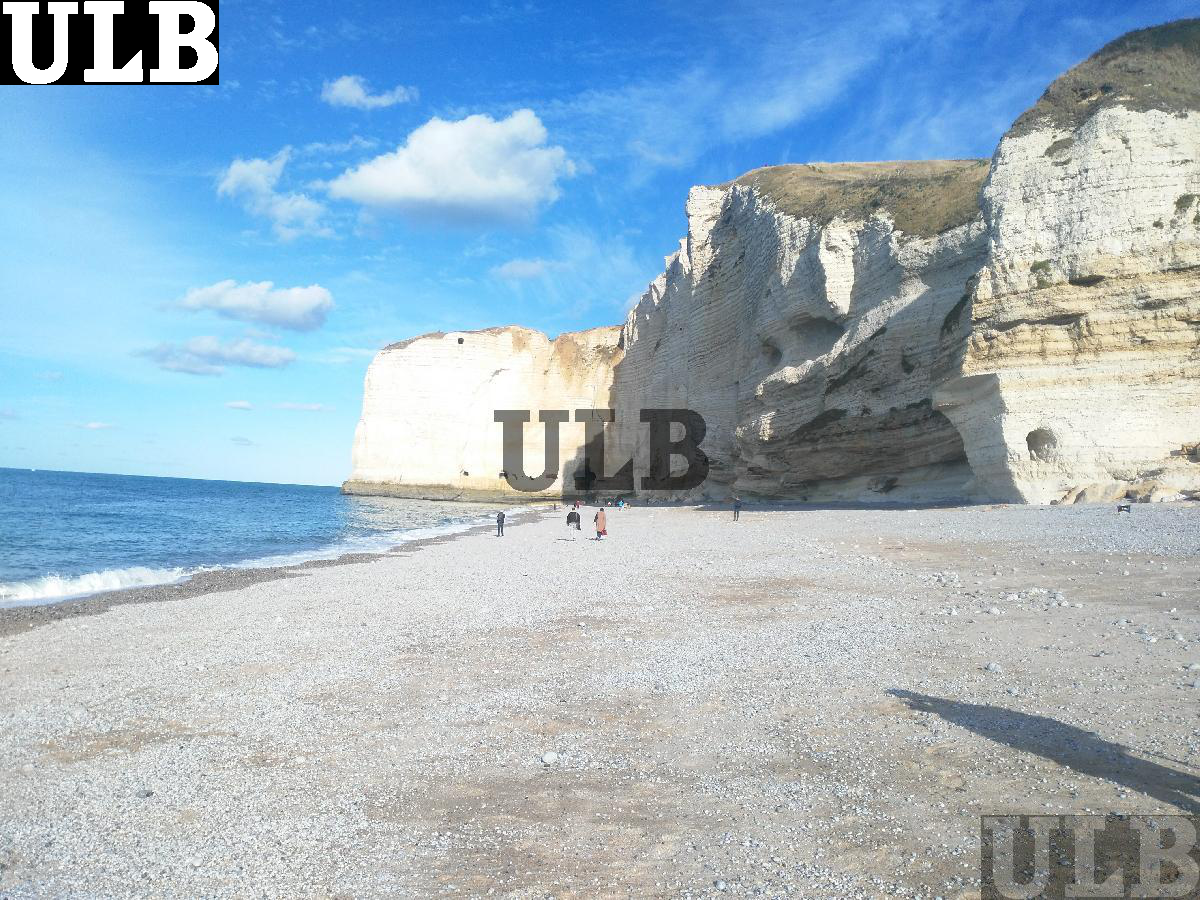

In [43]:
def add_watermark(input_image_path, watermark_path, output_image_path, position=(0,0)):
    # Open the original image using PIL
    original_image = Image.open(input_image_path)
    # Open the watermark image and convert it to RGBA mode
    watermark = Image.open(watermark_path).convert("RGBA")
    # Create a transparent layer with the same size as the original image
    transparent_layer = Image.new('RGBA', original_image.size, (0, 0, 0, 0))
    # Paste the watermark onto the transparent layer at the specified position
    transparent_layer.paste(watermark, position, watermark)
    # Use alpha_composite to combine the original image and the transparent layer
    watermarked_image = Image.alpha_composite(original_image.convert("RGBA"), transparent_layer)
    # Convert the result back to RGB mode
    watermarked_image = watermarked_image.convert("RGB")
    # Save the watermarked image to the specified output path
    watermarked_image.save(output_image_path)
    # Display the watermarked image using IPython.display
    display(watermarked_image)
# Set the paths for the input image, watermark, and output image
input_image_path = "myetretat.jpg"
output_image_path = "myetretat_mine.jpg"
watermark_path = "watermark.png"
# Call the add_watermark function with the specified paths
add_watermark(input_image_path, watermark_path, output_image_path)


The two images passed to Image.alpha_composite are expected to be in RGBA (Red, Green, Blue, Alpha) mode. The alpha channel represents the transparency of each pixel.

result_channel = (1 - alpha_foreground) * channel_background + alpha_foreground * channel_foreground

Here, alpha_foreground is the alpha value of the foreground pixel, and channel_background and channel_foreground are the corresponding color channels of the background and foreground pixels.
The output image is in RGBA mode, where the RGB channels represent the color information, and the A channel represents the alpha (transparency) information.
Image.alpha_composite is commonly used when overlaying images with transparency, such as adding watermarks, logos, or other elements with varying levels of opacity onto a background image.

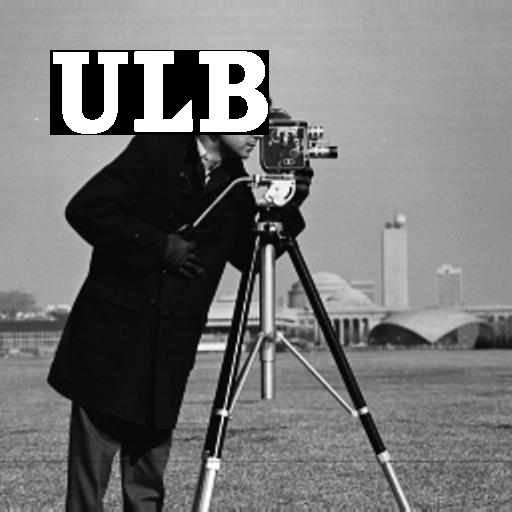

In [13]:
def add_watermark(input_image_path, watermark_path, output_image_path, position=(0, 0)):
    original_image = Image.open(input_image_path)

    watermark = Image.open(watermark_path).convert("RGBA")

    transparent_layer = Image.new('RGBA', original_image.size, (0, 0, 0, 0))

    transparent_layer.paste(watermark, position, watermark)

    watermarked_image = Image.alpha_composite(original_image.convert("RGBA"), transparent_layer)

    watermarked_image = watermarked_image.convert("RGB")

    watermarked_image.save(output_image_path)
    
    display(watermarked_image)

input_image_path = "camera.jpg"
output_image_path = "myetretat_mine2.jpg"
watermark_path = "watermark.png"

custom_position = (50, 50)

add_watermark(input_image_path, watermark_path, output_image_path, custom_position)


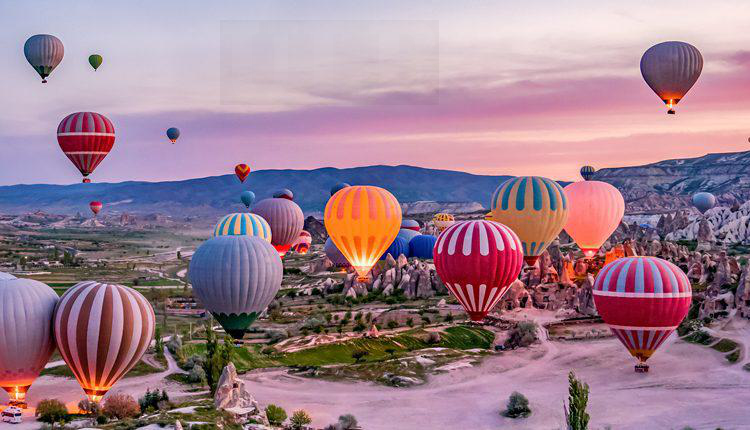

In [137]:
def add_watermark(input_image_path, watermark_path, output_image_path, position=(0, 0), transparency=128):

    original_image = Image.open(input_image_path)
    # Open the watermark image and convert it to RGBA mode
    watermark = Image.open(watermark_path).convert("RGBA")
    # Create a new RGBA image for the watermark with customizable transparency
    watermark_with_transparency = Image.new("RGBA", watermark.size)
    for x in range(watermark.width):
        for y in range(watermark.height):
            r, g, b, a = watermark.getpixel((x, y))
            watermark_with_transparency.putpixel((x, y), (r, g, b, transparency))
    # Create a transparent layer with the same size as the original image
    transparent_layer = Image.new('RGBA', original_image.size, (0, 0, 0, 0))
    # Paste the watermark with transparency onto the transparent layer at the specified position
    transparent_layer.paste(watermark_with_transparency, position, watermark_with_transparency)
    # Use alpha_composite to combine the original image and the transparent layer
    watermarked_image = Image.alpha_composite(original_image.convert("RGBA"), transparent_layer)
    # Convert the result back to RGB mode
    watermarked_image = watermarked_image.convert("RGB")
    # Save the watermarked image to the specified output path
    watermarked_image.save(output_image_path)
    # Display the watermarked image using IPython.display
    display(watermarked_image)

input_image_path = "copy_view.jpg"
output_image_path = "myetretat_mine3.jpg"
watermark_path = "watermark.png"
# Set custom position and transparency values
custom_position = (220, 20)
custom_transparency = 50
# Call the add_watermark function with the specified paths and custom parameters
add_watermark(input_image_path, watermark_path, output_image_path, custom_position, custom_transparency)


In [141]:
#cv2 refers to the OpenCV (Open Source Computer Vision) library in Python.
def remove_background(image_path):
    image = cv2.imread(image_path)
    #Use OpenCV to read the image specified by image_path.
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #Convert the image to grayscale, simplifying further processing.
    _, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY_INV)  # This is the important step
    #Threshold the grayscale image to create a binary mask (binary). Pixels with a value less than 1 become 255 (white), and others become 0 (black).
    #cv2.THRESH_BINARY_INV indicates binary thresholding with inversion. It means that pixels below the threshold become 255 (white), and those above become 0 (black).
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #Find contours in the binary mask using OpenCV's findContours function.
    mask = np.zeros_like(image)
    #Create an empty mask with the same size as the original image.
    cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)
    #Draw filled contours on the mask, effectively marking the region of interest (ROI) where the background needs to be removed.
    result = cv2.bitwise_and(image, mask)
    #Apply a bitwise AND operation between the original image and the mask to obtain the result without the background.
    result = cv2.bitwise_not(result)
    #Invert the result to get the image with the background removed.
    return result

image_path = 'watermark.png'
image_without_background = remove_background(image_path)

cv2.imshow('new_watermark.png', image_without_background)
cv2.waitKey(0)
cv2.destroyAllWindows()

#_ to indicate that it won't be used further.

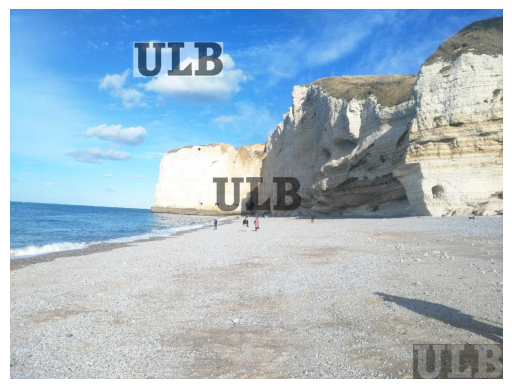

In [142]:
def add_watermark(input_image_path, watermark_image_path, output_image_path, position=(0, 0)):
    image = Image.open(input_image_path)
    watermark = Image.open(watermark_image_path)
     # Convert the image to grayscale and threshold it to create a luminosity mask
    luminosity = image.convert('L').point(lambda p: p > 128 and 255)
    # Check if the background is light or dark based on the luminosity mask
    if luminosity.getextrema()[0] == 255:  # Light background
        watermark = watermark.convert("RGB")
    else:  # Dark background
        watermark = watermark.convert("RGBA")
        watermark.putalpha(128) 

    image.paste(watermark, (300, 80), watermark)

    image.save(output_image_path)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

input_image_path = "myetretat.jpg"
output_image_path = "new.jpg"
watermark_path = "new_watermark.png"

add_watermark(input_image_path, watermark_path, output_image_path, position=(0, 0))


image.convert('L'):

image.convert('L') is an operation that converts the original image (image) to grayscale. The letter 'L' stands for luminance, and in this context, it means converting the image to a single-channel grayscale image.
lambda p: p > 128 and 255:

lambda is a keyword in Python used to create anonymous (nameless) functions. In this case, it's used to define a simple inline function that takes an input p and returns the result of the expression p > 128 and 255.
Explanation of the Lambda Function:

The lambda function is evaluating the pixel value p. If the pixel value is greater than 128, the result is True, which is equivalent to 1 in numeric terms. If the pixel value is not greater than 128, the result is False, which is equivalent to 0.
The expression p > 128 and 255 essentially checks if the pixel value is greater than 128. If it is, the result is 255; otherwise, the result is 0.
point Method:

The point method is then applied to the grayscale image. This method is used to process each pixel in the image using a function. The function provided (in this case, the lambda function) is applied to each pixel individually.

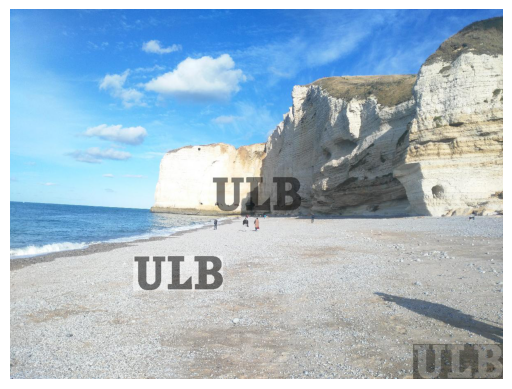

Average Brightness in the specified region: 111.03475833333333


In [132]:
def calculate_average_brightness(image):
    rgb_image = image.convert("RGB")
    # Get the pixel values as a list
    pixels = list(rgb_image.getdata())
    #Calculate the total brightness by summing up the RGB values for each pixel
    total_brightness = sum(sum(pixel) for pixel in pixels)
    # Calculate the average brightness by dividing the total brightness by the number of pixels and channels (3 for RGB)
    average_brightness = total_brightness / (len(pixels) * 3)  # 3 channels for RGB

    return average_brightness

def add_watermark(input_image_path, watermark_light_image_path, watermark_dark_image_path, output_image_path, position=(0, 0)):
    image = Image.open(input_image_path)
    watermark_light = Image.open(watermark_light_image_path)
    watermark_dark = Image.open(watermark_dark_image_path)

    average_brightness = calculate_average_brightness(image)

    if average_brightness > 128:  # Light background
        watermark = watermark_dark.convert("RGBA")
        watermark.putalpha(128) 
    else:  # Dark background
        watermark = watermark_light.convert("RGBA")
        watermark.putalpha(128) 
    image.paste(watermark, (300, 600), watermark)

    image.save(output_image_path)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

input_image_path = "myetretat.jpg"
output_image_path = "new.jpg"
watermark_light_image_path = "watermark.png"
watermark_dark_image_path = "new_watermark.png"

add_watermark(input_image_path, watermark_light_image_path, watermark_dark_image_path, output_image_path, position=(0, 0))

print(f"Average Brightness in the specified region: {average_brightness}")

Average Brightness in the specified region: 111.03475833333333


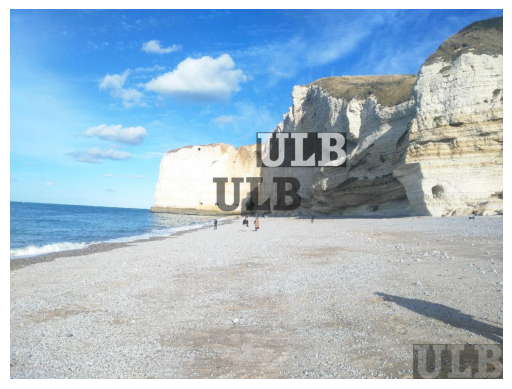

In [135]:
from PIL import Image

def calculate_average_brightness(image, position, region_size):
    # Extract the region of interest based on the position and region size
    region = image.crop((position[0], position[1], position[0] + region_size[0], position[1] + region_size[1]))

    # Convert the region image to RGB
    rgb_region = region.convert("RGB")

    # Get the pixel values as a list
    pixels = list(rgb_region.getdata())

    # Calculate the total brightness by summing up the RGB values for each pixel
    total_brightness = sum(sum(pixel) for pixel in pixels)

    # Calculate the average brightness by dividing the total brightness by the number of pixels and channels (3 for RGB)
    average_brightness = total_brightness / (len(pixels) * 3)  # 3 channels for RGB

    return average_brightness

# Example usage:
input_image_path = "myetretat.jpg"
position = (600, 300)  # Example position (x, y)
region_size = (200, 200)  # Example region size (width, height)

image = Image.open(input_image_path)
average_brightness = calculate_average_brightness(image, position, region_size)

print(f"Average Brightness in the specified region: {average_brightness}")

def add_watermark(input_image_path, watermark_light_image_path, watermark_dark_image_path, output_image_path, position=position):
    image = Image.open(input_image_path)
    watermark_light = Image.open(watermark_light_image_path)
    watermark_dark = Image.open(watermark_dark_image_path)

    average_brightness = calculate_average_brightness(image, position, region_size)

    if average_brightness > 128:  # Light background
        watermark = watermark_dark.convert("RGBA")
        watermark.putalpha(128) 
    else:  # Dark background
        watermark = watermark_light.convert("RGBA")
        watermark.putalpha(128) 
    image.paste(watermark, position,  watermark)

    image.save(output_image_path)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

input_image_path = "myetretat.jpg"
output_image_path = "new.jpg"
watermark_light_image_path = "watermark.png"
watermark_dark_image_path = "new_watermark.png"

add_watermark(input_image_path, watermark_light_image_path, watermark_dark_image_path, output_image_path, position=position)
